Homework 6

In [56]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

import xgboost as xgb

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-10-23 11:43:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv.3'

     0K .......... .......... .......... .......... ..........  3%  769K 2s
    50K .......... .......... .......... .......... ..........  7% 2.78M 1s
   100K .......... .......... .......... .......... .......... 10% 1.25M 1s
   150K .......... .......... .......... .......... .......... 14% 4.13M 1s
   200K .......... .......... .......... .......... .......... 17% 1.46M 1s
   250K .......... .......... .......... .......... .......... 21% 3.07M 1s
   300K .......... .......... .......... .......... .......... 25% 5.06M 1s
   350K .......... .......... 

In [3]:
data = pd.read_csv('housing.csv.1')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:

data = data[data.ocean_proximity.isin(['<1H OCEAN', 'INLAND'])]
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
data.total_bedrooms = data.total_bedrooms.fillna(0)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(9411, 3138, 3138)

In [7]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,134100.0,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,321800.0,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,110400.0,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,168200.0,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,156600.0,<1H OCEAN


In [8]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

df_train.drop(columns=['median_house_value'], inplace=True)
df_val.drop(columns=['median_house_value'], inplace=True)
df_test.drop(columns=['median_house_value'], inplace=True)

In [9]:
dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [10]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



In [11]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=1, random_state=1)

In [12]:
y_pred = rf.predict(X_val)

In [13]:
rmse = mean_squared_error(y_val, y_pred, squared = False)
rmse

0.24527740463893763

In [14]:
def rmse_cust(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [15]:
rmse_cust(y_val, y_pred)

0.24527740463893763

In [16]:
for n in range(10, 201, 10):
    print(n)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [17]:
rmse_scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=4)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared = False)
    rmse_scores.append((n, rmse))


KeyboardInterrupt: 

(0.233, 0.235)

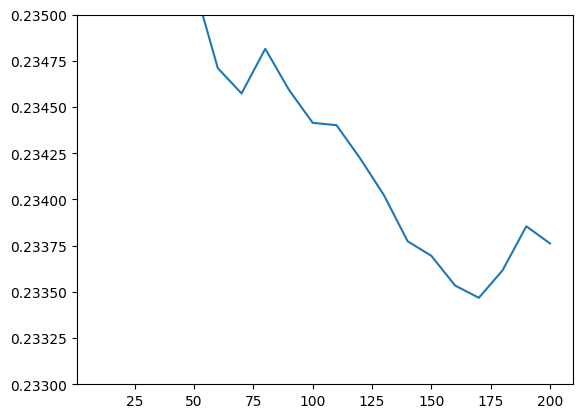

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

df_scores = pd.DataFrame(rmse_scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.ylim(0.233, 0.235)

In [ ]:
df_scores

,n_estimators,rmse
0,10,0.245277
1,20,0.239041
2,30,0.236995
3,40,0.235509
4,50,0.235162
5,60,0.234711
6,70,0.234574
7,80,0.234815
8,90,0.234593
9,100,0.234415


In [ ]:
mean_rmse = []
rmse_scores = []

for mdepth in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        print(mdepth,n)
        rf = RandomForestRegressor(n_estimators=n, max_depth=mdepth, random_state=1, n_jobs=8)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared = False)
        rmse_scores.append((mdepth, n, rmse))
        print(rmse)
        print('#################')
        

10 10
0.25067714286966963
#################
10 20
0.24767192873004384
#################
10 30
0.24643411411803706
#################
10 40
0.2451678037310998
#################
10 50
0.24555736366386038
#################
10 60
0.24535165259564862
#################
10 70
0.2454077033494555
#################
10 80
0.24564007678627323
#################
10 90
0.24553597121885165
#################
10 100
0.24544642000029057
#################
10 110
0.24534370553758386
#################
10 120
0.2451251370473533
#################
10 130
0.2448565412069584
#################
10 140
0.2446346287178102
#################
10 150
0.24459315934955642
#################
10 160
0.24450136088985566
#################
10 170
0.24446036538559981
#################
10 180
0.2445688226649631
#################
10 190
0.24477143849125327
#################
10 200
0.24477302121092487
#################
15 10
0.24577217152575975
#################
15 20
0.23958260550158159
#################
15 30
0.23772942052310084
#

In [ ]:
rmse_df = pd.DataFrame(rmse_scores, columns=["max_depth", "n", "rmse"])
rmse_mean = rmse_df.groupby("max_depth").rmse.mean()
rmse_mean.head()

max_depth
10    0.245526
15    0.235966
20    0.235154
25    0.234784
Name: rmse, dtype: float64

In [20]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [21]:
feature_importances = rf.feature_importances_
feature_importances


array([0.0151361 , 0.03031726, 0.10200703, 0.08624381, 0.33561113,
       0.29247297, 0.07380644, 0.02713606, 0.01585222, 0.02141699])

In [30]:
feature_names = dv.get_feature_names_out()
feature_names

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [29]:
feature_importance_dict = dict(zip(feature_names, feature_importances))
feature_importance_dict

{'households': 0.015136098446818508,
 'housing_median_age': 0.030317256108796202,
 'latitude': 0.10200703165624662,
 'longitude': 0.08624381391950194,
 'median_income': 0.335611127995489,
 'ocean_proximity=<1H OCEAN': 0.29247296545343093,
 'ocean_proximity=INLAND': 0.07380644294558006,
 'population': 0.027136059019747038,
 'total_bedrooms': 0.015852218895139162,
 'total_rooms': 0.021416985559250534}

In [39]:
feature_names = [i.replace("=<", "_").replace("=","_") for i in feature_names]

In [40]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=feature_names)

In [58]:
watchlist = [(dtrain, 'train'), (dval, 'val')]



In [59]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)

In [60]:
s = output.stdout


In [51]:
print(s)

[0]	train-rmse:0.44350	val-rmse:0.44250
[5]	train-rmse:0.25338	val-rmse:0.27463
[10]	train-rmse:0.21444	val-rmse:0.25179
[15]	train-rmse:0.19858	val-rmse:0.24522
[20]	train-rmse:0.18524	val-rmse:0.23978
[25]	train-rmse:0.17757	val-rmse:0.23830
[30]	train-rmse:0.16888	val-rmse:0.23570
[35]	train-rmse:0.16113	val-rmse:0.23416
[40]	train-rmse:0.15542	val-rmse:0.23318
[45]	train-rmse:0.14941	val-rmse:0.23190
[50]	train-rmse:0.14536	val-rmse:0.23225
[55]	train-rmse:0.14150	val-rmse:0.23197
[60]	train-rmse:0.13719	val-rmse:0.23139
[65]	train-rmse:0.13259	val-rmse:0.23158
[70]	train-rmse:0.12943	val-rmse:0.23068
[75]	train-rmse:0.12555	val-rmse:0.23039
[80]	train-rmse:0.12192	val-rmse:0.22886
[85]	train-rmse:0.11854	val-rmse:0.22888
[90]	train-rmse:0.11496	val-rmse:0.22861
[95]	train-rmse:0.11211	val-rmse:0.22908
[99]	train-rmse:0.10989	val-rmse:0.22862



In [52]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [61]:
df_score = parse_xgb_output(output)

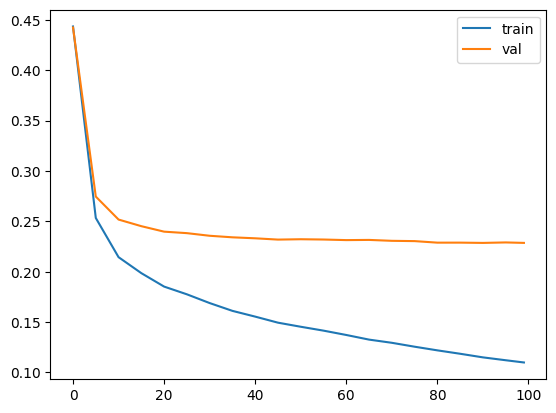

In [57]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

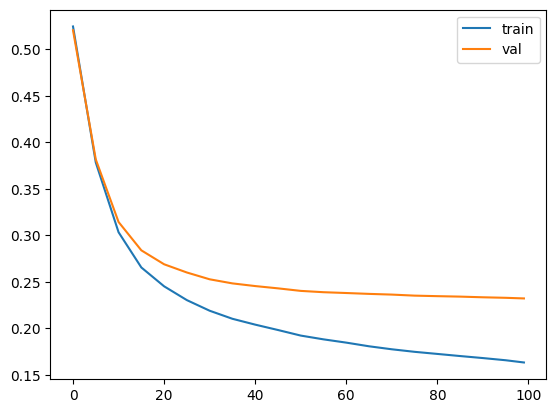

In [62]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()